## Importing Libraries

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score

 - Pandas is used loading and viewing our dataset, also to process, clean and manipulate dataset.
 - Seaborn and Matplotlib to plot and visualize dataset.
 - Sklearn to call / implement any of Machine learning model we want to assign.

## Load Dataset

In [2]:
Telco = pd.read_csv('Telcom.csv')
pd.set_option('display.max_columns', None)
Telco.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Dataset Profiling

In [3]:
print("Dataset dimension :", Telco.ndim)
print("Dataset shape :", Telco.shape)
print("Dataset size :", Telco.size)

Dataset dimension : 2
Dataset shape : (7043, 21)
Dataset size : 147903


 - Dataset has 2 dimensions, comprises of 7043 observations (rows) and 21 features (columns), multiplying the two numbers, we have a total 147903 number of elements of our dataset.

In [4]:
Telco_types = Telco.dtypes.reset_index()
Telco_types.columns = ['Features','Data Type']
Telco_types

,Features,Data Type
0,customerID,object
1,gender,object
2,SeniorCitizen,int64
3,Partner,object
4,Dependents,object
5,tenure,int64
6,PhoneService,object
7,MultipleLines,object
8,InternetService,object
9,OnlineSecurity,object


 - Dataset is dominated by object / string Dtype with total of 18 variables, while the rest 3 variables are mix of integer and float.

## Dataset Missing and Blank Values Checking 

In [5]:
missing_data = Telco.isnull().sum().reset_index()
missing_data.columns = ['Features','Missing Values']
blank_data = Telco.apply(lambda x : x == ' ').sum().reset_index()
blank_data.columns = ['Features','Blank Values']
merged_data = pd.merge(missing_data, blank_data, on=['Features'])
merged_data['Filling Factor'] = (Telco.shape[0]-missing_data['Missing Values'] + Telco.shape[0]-blank_data['Blank Values'])/Telco.shape[0]*50
merged_data.sort_values(by='Filling Factor',ascending=True)

,Features,Missing Values,Blank Values,Filling Factor
19,TotalCharges,0,11,99.921908
0,customerID,0,0,100.000000
18,MonthlyCharges,0,0,100.000000
17,PaymentMethod,0,0,100.000000
16,PaperlessBilling,0,0,100.000000
15,Contract,0,0,100.000000
14,StreamingMovies,0,0,100.000000
13,StreamingTV,0,0,100.000000
12,TechSupport,0,0,100.000000
11,DeviceProtection,0,0,100.000000


 - TotalCharges has 11 blank spaces. Confirmed there are missing values from dataset.
 - Locating the datas with the blank spaces in dataset.

### Locating Blank Values Data

In [6]:
filt = (Telco['TotalCharges'] == ' ')
Telco.loc[filt]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- The data needs to be cleaned of missing value, proceed to data cleaning.
- The process can be done by simply filling the blank space in TotaCharges variable by 0.

## Data Cleaning

 - As shown above, TotalCharges is still in object / string. Have to change it to either integer or float before. From dataset preview, we know that some of the values of this feature are decimal, then float is the choice.
 - Replacing the blank spaces by 0.0, because we choose float as our type for TotalCharges.
 - Using replace() to change blank spaces (' ') to ('0.0'), and then locate the replaced datas.

In [7]:
Telco['TotalCharges'] = Telco['TotalCharges'].replace([' '],['0.0'])
Telco.loc[(Telco['TotalCharges'] == '0.0')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


 - The initial blank spaces of the variable have now been replaced by the 0.0's. 
 - It can now be properly changed to its proper type, float.

In [8]:
Telco['TotalCharges'] = Telco['TotalCharges'].astype(float)

 - Confirming that the variable's type has been changed using df.dtypes.

In [9]:
Telco['TotalCharges'].dtypes

dtype('float64')

 - Further look into SeniorCitizen as it has a value 0 but instead its variable type is object / string and not integer. 
 - Check to see how many unique values for SeniorCitizen.

In [10]:
print('Unique value(s) of SenioCitizen : ', Telco['SeniorCitizen'].unique())
print(Telco['SeniorCitizen'].value_counts())

Unique value(s) of SenioCitizen :  [0 1]
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


 - The SeniorCitizen should be of categorical, as it only has two values '0' and '1'.
 - Changing this variable into a string / object type value, also replacing the both value of '0' and '1' to 'No' and 'Yes' 
 - Using the same replace method as the above to replace the values of '0' and '1' to 'No' and 'Yes' respectively.

In [11]:
Telco['SeniorCitizen'] = Telco['SeniorCitizen'].astype(object)
Telco['SeniorCitizen'] = Telco['SeniorCitizen'].replace([0,1],['No','Yes'])
Telco.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [12]:
Telco['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

 - Both of the 0 and 1 have been replaced for SeniorCitizen.

## Taking a look at Basic Data Structure

In [13]:
Telco.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


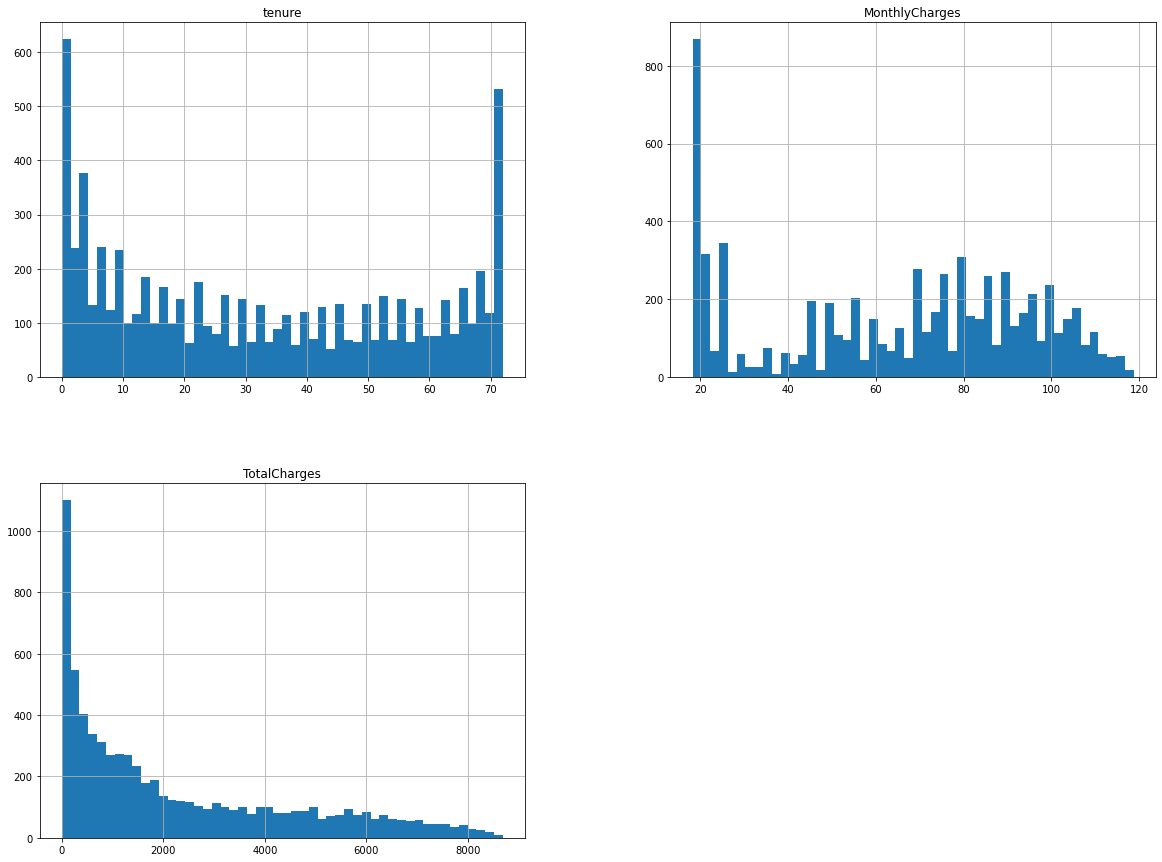

In [14]:
%matplotlib inline
Telco.hist(bins=50, figsize=(20,15))
plt.show()

### Outliers Checking

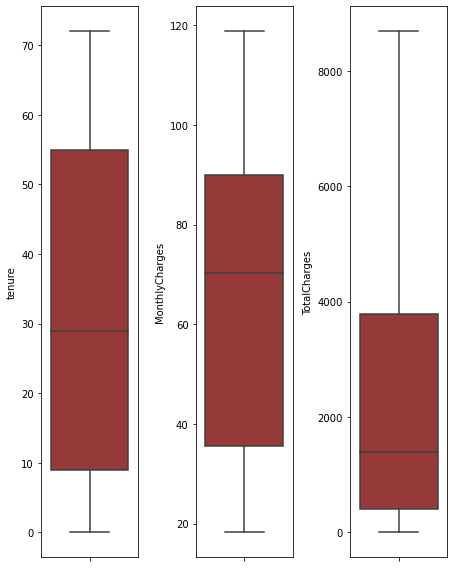

In [15]:
num = Telco[['tenure','MonthlyCharges','TotalCharges']]
feat_num = list(num)

plt.figure(figsize=(15, 8))
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=Telco[feat_num[i]],color='brown',orient='v')
    plt.tight_layout()

 - There are no outliers detected in dataset, procced to preparing data for machine learning algorithm.

## Prepare Data For Machine Learning 

### Imbalance Target Data Checking

 - We want to make a model which can predicts if a customer would churn from their subscription (categorized as churn) or not. Checking each value of the Churn feature to determine it is imbalanced or not.

In [16]:
print('Unique value(s) of Churn : ', Telco['Churn'].unique())
print(Telco['Churn'].value_counts())

Unique value(s) of Churn :  ['No' 'Yes']
No     5174
Yes    1869
Name: Churn, dtype: int64


 - It is rather an imbalanced data.
 - Accuracy will not be the best tool to measure performance of the model. Precision, Recall and F1 Score are preferable.

In [17]:
Telco['Churn'] = Telco['Churn'].replace(['No','Yes'],[0,1])
Telco['Churn'] = Telco['Churn'].astype(np.int64)

print('Unique value(s) of Churn : ', Telco['Churn'].unique())
print(Telco['Churn'].value_counts())

Unique value(s) of Churn :  [0 1]
0    5174
1    1869
Name: Churn, dtype: int64


In [18]:
Telco['Churn'].dtypes

dtype('int64')

### Splitting Dataset to Train dan Test Set

 - Splitting dataset into Train and Test set with a proportion of 75% Train and 25% Test.

In [20]:
X = Telco.drop(['Churn','customerID'], axis=1)
Y = Telco['Churn']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=50)

 - Train and Test Set Profiling.

In [28]:
print("Train set dimension :", X_train.ndim)
print("Train set shape :", X_train.shape)
print("Train set size :", X_train.size)

Train set dimension : 2
Train set shape : (5282, 19)
Train set size : 100358


In [29]:
print("Test set dimension :", X_test.ndim)
print("Test set shape :", X_test.shape)
print("Test set size :", X_test.size)

Test set dimension : 2
Test set shape : (1761, 19)
Test set size : 33459


### Splitting Numerical and Categorical Feature

In [26]:
X_train_num = X_train[['tenure','MonthlyCharges','TotalCharges']]
X_train_num

,tenure,MonthlyCharges,TotalCharges
5368,3,70.30,235.50
6823,4,50.55,235.65
4861,48,58.95,2789.70
4132,13,23.90,300.80
5832,20,70.45,1470.95
...,...,...,...
2014,13,61.80,750.10
6253,56,44.85,2564.95
1931,53,111.80,5809.75
5600,7,69.95,529.50


In [30]:
X_train_cat = X_train.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)
X_train_cat

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5368,Female,Yes,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
6823,Female,No,No,No,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
4861,Female,Yes,Yes,No,Yes,No,DSL,No,Yes,No,No,No,Yes,One year,Yes,Bank transfer (automatic)
4132,Female,No,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
5832,Male,No,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,Male,No,Yes,Yes,Yes,No,DSL,No,Yes,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic)
6253,Female,No,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
1931,Female,No,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic)
5600,Male,No,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)


### Data Preprocessing: Custom Pipeline Transformation

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

num_attribs = ['tenure','MonthlyCharges','TotalCharges']
cat_attribs = ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
               'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
               'Contract','PaperlessBilling','PaymentMethod']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)

X_train_prepared

array([[-1.19977691,  0.19255967, -0.90066039, ...,  0.        ,
         1.        ,  0.        ],
       [-1.15892587, -0.46259923, -0.90059414, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63851983, -0.18394937,  0.22743023, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.84277503,  1.56922269,  1.56126864, ...,  0.        ,
         0.        ,  0.        ],
       [-1.03637276,  0.18094926, -0.77081204, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.61894477,  1.45643584,  2.4047308 , ...,  0.        ,
         1.        ,  0.        ]])

## Selecting and Train Models on Training Set

 - Machine learning algorithms to be used are Support Vector Classifier, Random Forest CLassifier and Sctochastic Gradient Boosting Classifier.
 - Training each of the machine learning model into the full train set.

### Support Vector Classifiers

In [51]:
# Choosing Model
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train_prepared, y_train)
predictions = svm_clf.predict(X_train_prepared)

# Evaluating Model Selection
print('SVC Precision',precision_score(y_train, predictions))
print('SVC Recall',recall_score(y_train, predictions))
print('SVC F1 Score',f1_score(y_train, predictions))

SVC Precision 0.7275362318840579
SVC Recall 0.535181236673774
SVC F1 Score 0.6167076167076166


### Random Forest Classifiers

In [52]:
# Choosing Model
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=50)
forest_clf.fit(X_train_prepared, y_train)
predictions = forest_clf.predict(X_train_prepared)

# Evaluating Model Selection
print('Forest Precision',precision_score(y_train, predictions))
print('Forest Recall',recall_score(y_train, predictions))
print('Forest F1 Score',f1_score(y_train, predictions))

Forest Precision 0.9964438122332859
Forest Recall 0.9957356076759062
Forest F1 Score 0.9960895840739425


### Stochastic Gradient Boosting

In [53]:
# Choosing Model
from sklearn.ensemble import GradientBoostingClassifier
SGB_clf = GradientBoostingClassifier()
SGB_clf.fit(X_train_prepared, y_train)
predictions = SGB_clf.predict(X_train_prepared)

# Evaluating Model Selection
print('SGB Precision',precision_score(y_train, predictions))
print('SGB Recall',recall_score(y_train, predictions))
print('SGB F1 Score',f1_score(y_train, predictions))

SGB Precision 0.7312775330396476
SGB Recall 0.589907604832978
SGB F1 Score 0.6530291109362707


## Model Evaluation Through Cross Validations

 - Cross validation on training set to verifiy if the models used are underfitting or overfitting the train set.

### Random Forest Cross Validations

In [61]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train_prepared, y_train,
                                scoring="f1", cv=10)
forest_f1_scores = forest_scores

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(forest_f1_scores)

Scores: [0.59375    0.4978903  0.54961832 0.56680162 0.496      0.56066946
 0.64092664 0.54545455 0.58730159 0.54393305]
Mean: 0.5582345519545561
Standard deviation: 0.041207055436932476


### SGB Cross Validations

In [62]:
from sklearn.model_selection import cross_val_score

SGB_scores = cross_val_score(SGB_clf, X_train_prepared, y_train,
                                scoring="f1", cv=10)
SGB_f1_scores = SGB_scores

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(SGB_f1_scores)

Scores: [0.65900383 0.54545455 0.57587549 0.63157895 0.56126482 0.61354582
 0.61788618 0.57254902 0.58964143 0.56916996]
Mean: 0.5935970042696258
Standard deviation: 0.0338246409586718


### Support Vector Cross Validations

In [63]:
from sklearn.model_selection import cross_val_score

SVC_scores = cross_val_score(svm_clf, X_train_prepared, y_train,
                                scoring="f1", cv=10)
SVC_f1_scores = SVC_scores

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(SVC_f1_scores)

Scores: [0.640625   0.50212766 0.5984252  0.60082305 0.49382716 0.6097561
 0.59836066 0.55284553 0.58870968 0.58823529]
Mean: 0.5773735315477146
Standard deviation: 0.04469109186492167


 - All 3 models evaluated are not as good as it seems when compared the initial f1 score to the cross validation f1 score, especially random forest. A huge gap between the two values of f1. 
 - Random forest heavily overfitting training set, whilst SGB and SVC are quite underperforming. 

## Grid Search for The Best Hyperparameter

 - Using Grid Search to find the best hyperparameter for each machine learning models.
 - Different hyperparameters are set in corresponding with each different models used.

### Support Vector Classifiers

In [66]:
from sklearn.model_selection import GridSearchCV

# Define Model and Hyperparameters
svm_clf = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [400, 200, 100, 50, 10, 1.0, 0.1, 0.01]
gamma = ['scale','auto']

# Define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
grid_search = GridSearchCV(estimator=svm_clf, param_grid=grid, n_jobs=-1, cv=5, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_prepared, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.586844 using {'C': 1.0, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.501908 (0.018793) with: {'C': 400, 'gamma': 'scale', 'kernel': 'poly'}
0.498921 (0.013718) with: {'C': 400, 'gamma': 'scale', 'kernel': 'rbf'}
0.498485 (0.028179) with: {'C': 400, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.555562 (0.015365) with: {'C': 400, 'gamma': 'auto', 'kernel': 'poly'}
0.559147 (0.015084) with: {'C': 400, 'gamma': 'auto', 'kernel': 'rbf'}
0.491850 (0.055534) with: {'C': 400, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.514287 (0.017490) with: {'C': 200, 'gamma': 'scale', 'kernel': 'poly'}
0.506478 (0.016749) with: {'C': 200, 'gamma': 'scale', 'kernel': 'rbf'}
0.497030 (0.024206) with: {'C': 200, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.564824 (0.013961) with: {'C': 200, 'gamma': 'auto', 'kernel': 'poly'}
0.564823 (0.017654) with: {'C': 200, 'gamma': 'auto', 'kernel': 'rbf'}
0.488040 (0.047271) with: {'C': 200, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.525053 (0.018862) with: {'C': 100, 'gamma': 'scale

### Random Forest

In [68]:
# Define Models and Hypeparameters
forest_clf = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2','auto']
criterion = ['gini','entropy']

# Define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,criterion=criterion)
grid_search = GridSearchCV(estimator=forest_clf, param_grid=grid, n_jobs=-1, cv=5, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_prepared, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.563790 using {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}
0.526928 (0.024047) with: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}
0.554674 (0.023186) with: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
0.559583 (0.018735) with: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 1000}
0.518984 (0.013755) with: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 10}
0.553208 (0.022185) with: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}
0.553784 (0.021506) with: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000}
0.508203 (0.022386) with: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}
0.557038 (0.017407) with: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}
0.557366 (0.022102) with: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 1000}
0.515664 (0.026304) with: {'criterion': 'entropy', 'max_features': 'sqrt

### Stochastics Gradient Boosting

In [69]:
# Define Models and Hyperparameters
SGB_clf = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1, 1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# Define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
grid_search = GridSearchCV(estimator=SGB_clf, param_grid=grid, n_jobs=-1, cv=5, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_prepared, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.591789 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.381675 (0.024803) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.377430 (0.025725) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.370805 (0.015685) with: {'learning_rate': 0.001, '

### Best Model 

In [72]:
print(grid_result.best_estimator_)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000, subsample=0.7)


 - Sthocastic Gradient Boosting is the best estimator amongst the 3 models evaluated. 

### Fit Model to The Test Set

In [74]:
# Choosing best model
final_model = grid_result.best_estimator_

# Pipeline Transformation for Test set
X_test_prepared = full_pipeline.fit_transform(X_test)

# Fitting to Test Set
final_predictions = final_model.predict(X_test_prepared)

### Model Evaluation on Test Set

In [75]:
print('Final Model Precision',precision_score(y_test, final_predictions))
print('Final Model Recall',recall_score(y_test, final_predictions))
print('Final Model F1 Score',f1_score(y_test, final_predictions))

Final Model Precision 0.6294416243654822
Final Model Recall 0.5367965367965368
Final Model F1 Score 0.5794392523364486


 - The test set f1 score is slighly lower than that of the train set even after using the best estimator available provided by gridsearch. This is most likely due to doing lots of hyperparameter tuning. The model instead fine tuned and performed well on the train / validatin set, however in case of new instances / new data, it did not generelize very well. Hence the slight drop of score in test set.

 ### Takeaways From This Assignment

 - One of the models, Random Forest, is heavily overfitting the train set. Judging by a relatively high f1 score on the full training set when being compared to validation f1 score, a huge gap between the two f1 scores. 
 - The other 2 models are underwhelming as well for this particular dataset.
 - Validation f1 scores for each model is different and is also lower than that of full train set score. Especially Random Forest in which has a staggering differences of 40%.
 - Hyperparameter tuning using grid search only improves each model around 2% or 3% at max. 
 - Judging from the above facts, we should not spend too much time on tuning or getting the best hyperparameters for our model. If a model or models are underperforming to fit to the dataset, we should better off focusing more on the dataset itself. Extracting more information from dataset, build a better data would and will improve any model in which we are going to use to fit the dataset into.  
 - Final word, data centric approach is a viable option to get the best out of machine learning models available.